# Bayesian Regressor Tool - (from scratch)

### Objective:
Create a Bayesian Regression class that takes a log posteriori, data points, number of walkers, etc as initilization and provides all required methods and attributes required for Bayesian Regression. 

The class should also be able to provide an integration method that allows you to integrate with respect to the posteriori distribution. Additionally, the class should allow to calculate all probabilities including the predictive distribution. 

Also include methods for visualization such as corner maps.

### The Experiment
The data below is in the form (x,t) and represents the height x of the tide at a specific location over the course of a day. Time is represented by the variable t. Predict the tide height at any given time t.

In [1]:
data = [(12.676817787115283, 4.840968499185621),
 (3.0635215093963133, 3.14922059397124),
 (8.9357879700357667, 5.431164887988198),
 (13.150389074317657, 0.2734372074578954),
 (12.925121692101902, 5.02106046462978),
 (10.269853674176913, 3.7776881451798454),
 (8.5618490817719284, 1.7531496843623315),
 (11.652310665546354, 0.13740741237008774),
 (15.785676964359141, 0.1589401373556326),
 (10.709910995988764, 1.405806821770987),
 (7.1341191045745171, 5.791539306670335),
 (21.883583042704814, 5.375575646320319),
 (9.3509495831601566, 1.5283167578387404),
 (8.9421204746670746, 1.2943521169392636),
 (7.9107785943448947, 2.41326855106268),
 (6.6761875778137583, 5.605375440538395),
 (11.650996974527924, 4.935997586415922),
 (17.290020321649969, 5.274010438371379),
 (13.06634684581484, 0.2347909715055829),
 (9.2602800850011402, 1.9716673533870746),
 (13.919837953941261, 5.528598466510076),
 (7.9171739378319606, 5.84750784658713),
 (12.864499776009934, 0.8278490177929644),
 (10.571617689971236, 2.36723797633488),
 (15.697626403745566, 6.217581078023053),
 (6.9542139194365262, 3.1860455750181425),
 (13.120156492593505, 4.864593354788696),
 (11.454973850882114, 1.8798442605946453),
 (10.614021877252608, 0.8044135861997307),
 (7.568300166951679, 2.673290291826998),
 (10.183500038106194, 1.309623551484031),
 (13.503996786942462, 0.04020573153381622),
 (14.908454853041013, 5.049774593191907),
 (16.502324161297746, 5.406433813862234),
 (7.7831240000772652, 5.45198929005635),
 (2.7144705188261025, 4.10012261788714),
 (6.3268913726889187, 5.6611505113173575),
 (9.343465517423013, 3.2971190116581632),
 (10.029091959312348, 0.5986208146884879),
 (12.078957723820951, 0.3853462849024228),
 (12.542705834818268, 1.5820979005652125),
 (9.8489274946698337, 2.6735253975153426),
 (11.349497927312719, 1.1055955472925354),
 (11.06556939865615, 2.5611692213120962),
 (11.242786106546351, 0.6500902431293415),
 (7.5720317139333542, 3.4428084142928075),
 (10.19301456907124, 2.427329872753534),
 (11.688185995125892, 0.14941531339444405),
 (13.321217017544326, 4.226862591173392),
 (9.2226853401109601, 2.3990630763955374),
 (7.0737562512314449, 0.8821159241146929),
 (5.5158907409668556, 2.287657630597947),
 (5.2424711689478309, 3.4418528431658317),
 (11.826235109408199, 3.3038133315910185),
 (6.2478202112864949, 3.7493402648869223),
 (7.2776616254733053, 2.666108760536187),
 (14.728663233221567, 5.923646379789856),
 (11.088563226667782, 2.974838497958867),
 (11.458847468046265, 1.2931851555147837),
 (4.0709653063610656, 2.4390760560779694),
 (15.530850378396899, 0.7685325485891545),
 (11.615168564683962, 2.7271570577326223),
 (10.632288760396049, 5.37570954124343),
 (6.9102179020649883, 1.9530381191410195),
 (7.1344237045084675, 1.6373486764522571),
 (2.4211573415830188, 2.810112760589519),
 (7.6108111175276107, 4.181915055702122),
 (9.6538205198090434, 4.444382820070389),
 (8.1905132263562983, 3.0534156042900285),
 (7.4546566492388493, 5.388475797989607),
 (14.087818085722649, 4.961727257154151),
 (7.2780971375915371, 2.54178907740794),
 (13.49355600611988, 2.493864649506947),
 (7.1166182479555999, 3.0195450895358524),
 (13.861336288014931, 6.246482002469356),
 (9.9498449141955589, 1.5817110088866608),
 (12.090250168282912, 3.990269038499848),
 (14.0111497595614, 0.9108297343631235),
 (9.3928518482934216, 3.3950553805254793),
 (8.2709147406350212, 3.214121983305056),
 (8.386404092046515, 2.1119573572471135),
 (6.9673744914092852, 2.2083135342567983),
 (9.5162641851488523, 3.2184133097802943),
 (17.967580316152478, 3.965622119805391),
 (15.832368008468372, 0.828357131652206),
 (5.3317615928107358, 2.6644501925548774),
 (5.8971983697046877, 3.0341229253117494),
 (17.963906775041007, 6.0469989006758444),
 (5.6300726881847361, 2.4077579346402826),
 (11.348534324413565, 3.8699231013565725),
 (10.028167958705753, 1.9397974132848168),
 (14.062219131934697, 4.41603067403343),
 (9.10707255345568, 0.8011371320017451),
 (10.567716164156263, 4.450436137829604),
 (10.928830310193101, 4.839816330906595),
 (11.681478622619728, 0.8572196990559613),
 (11.538949263967641, 5.760338188965996),
 (10.978084516398958, 4.49756314191279),
 (12.818751132975834, 4.411544813273495),
 (6.7181748281785731, 5.484421751460473)]


# Code for Class Objects

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
import emcee
get_ipython().magic(u'matplotlib inline')
import corner



class Bayes:
    def __init__(self, atom, prior, data, nwalkers, ndim, nsteps):
        
        log_atom = atom
        #Log of the likelihood is the sum of all log of atom after we put our data through
        log_like = lambda x: np.sum([log_atom(x)(e) for e in data]) 
        log_prior = prior
        # the ln probability is just the sum or our log likelihood and log prior
        ln = lambda x: log_like(x) + prior(x)
        
        #self.data takes the value of one variable but in our case that one variable is a list.
        self.data = data
        self.nwalkers = nwalkers
        #we have a dimension for our walker and one dimension per parameter (omegas and lambda)
        self.ndim = ndim
        #number of steps each walker takes
        self.nsteps = nsteps
        self.N = len(data)
        
        #emcee starts here
        sampler = emcee.EnsembleSampler(self.nwalkers, self.ndim, ln)
        p0 = np.random.rand(self.nwalkers * self.ndim).reshape((self.nwalkers , self.ndim))*10
        #random is distribution walkers along the x axis randomly. between 0 and 1
        # BUT we want walkers to be randomly distributed along x xis from 0 to 10- bc thats where our data is
        #times 10 bc we want 
    
        # we get rid of our first 1000 samples (aka the steps of our walkers) because at first they're 
        #just finding their way but we store where they last left off from the first 1000 steps
        #so that they have a good starting point when the real walk begins
        pos, prob, state = sampler.run_mcmc(p0, 1000)
        sampler.reset()
        pos, prob, state = sampler.run_mcmc(pos, self.nsteps)
        self.samples = sampler.flatchain
        
        
        X = [x[0] for x in data]
        T = [x[1] for x in data]
        fig, ax = plt.subplots(1,1, figsize = (5,3))
        ax.scatter(T, X)
        ax.set_xlabel('Time')
        ax.set_ylabel('Height')
        ax.grid()

    def MonteCarlo(self, f, samples):
        N = len(self.samples)
        return 1/float(N)*sum([f(e) for e in self.samples])
        
    def reg(self):
        #calling the MonteCarlo method for each column in my samples, 
        omega0 = self.MonteCarlo(lambda x: x[0], self.samples)
        omega1 = self.MonteCarlo(lambda x: x[1], self.samples)
        omega2 = self.MonteCarlo(lambda x: x[2], self.samples)
        omega3 = self.MonteCarlo(lambda x: x[3], self.samples)
        lam = self.MonteCarlo(lambda x: x[4], self.samples)
        print ('omega0 = {0}, omega1 = {1},omega2 = {2},omega3 = {3}, Lam = {4}'.format(omega0, omega1, omega2, omega3, lam))
       
        Xval = np.arange(0,7)
        # plugging in omegas from MonteCarlo method
        Reg =[omega0 + omega1* (omega2 * np.sin(x) + omega3 * np.cos(x)) for x in Xval]
        X = [x[0] for x in data]
        T = [x[1] for x in data]
        
        fig, ax = plt.subplots(1,1, figsize = (5,3))
        ax.scatter(T,X)
        ax.plot(Xval, Reg, label ='Regression', color = 'red')
        ax.set_xlabel('Time')
        ax.set_ylabel('height')
        ax.legend(loc = 'best', fontsize='small')
        ax.grid()
        
    def prediction(self, time, function, Lrange, Urange):
        self.time = time
        self.function = function
        #the lower and upper bounds for the range I want my prediction to have. refer to 'T' below.
        self.Lrange = Lrange
        self.Urange = Urange
        #the function I'm going to input is the normal curve with the mu replaced by my sine function.
        #f = lambda x, t: lambda d: np.sqrt(d[4]/(2*np.pi)) * np.exp(-0.5 * d[4] * (t - (d[0] + d[1]* (d[2]* np.sin(x) + d[3] * np.cos(x))))**2)
        predictiveDist = lambda t: np.vectorize(lambda x: self.MonteCarlo(lambda d: self.function(t,x)(d), self.samples))
        T = np.arange(self.Lrange, self.Urange)
        plt.plot(T,predictiveDist(self.time)(T)) #prediction should be at x = 8
    
    def plot_density(self):
        data = pd.DataFrame(self.samples, columns =['omega0', 'omega1', 'omega2', 'omega3', 'Lam'])
        data.plot(kind = 'Density')
        
    def plot_corner(self):
        fig = corner.corner(self.samples, labels=["$\omega_0$", "$\omega_1$", "$\omega_2$","$\omega_3$","$\lambda$"])


In [27]:
#inputs

atom= lambda x: lambda e: -np.infty if x[4] < 0 else \
0.5 * np.log(x[4]) -(x[4]/2) * (e[0] - (x[0] + x[1]* (x[2]* np.sin(e[1]) + x[3] * np.cos(e[1]))))**2
    
logprior = lambda x: (-0.5) * (x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2) - x[4] 



# Plot of Observations

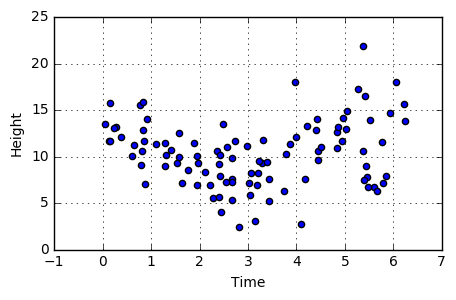

In [28]:
ellen = Bayes(atom, logprior, data, 20 ,5, 10000)



# Regression Line:

Using the parameters we found using the emcee sampler, we will now plot our regression line to fit the data.

omega0 = 9.4826410024, omega1 = -1.33821478692,omega2 = 0.518339301263,omega3 = -1.502658768, Lam = 0.0957472963968


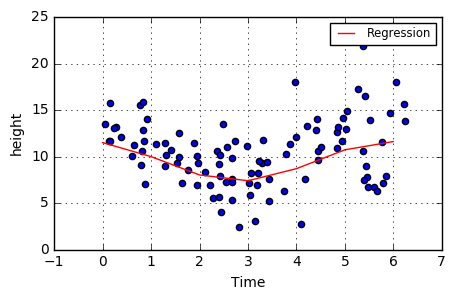

In [29]:
ellen.reg()

# Prediction

Here at time '8' we can see that the data is normally distributed and the most likely wave height near 9.

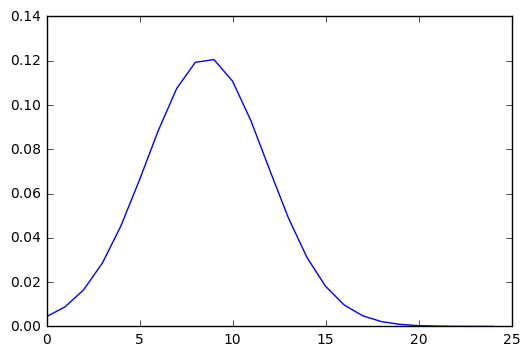

In [33]:
here = lambda t,x: lambda d: np.sqrt(d[4]/(2*np.pi)) * \
np.exp(-0.5 * d[4] * (x - (d[0] + d[1]* (d[2]* np.sin(t) + d[3] * np.cos(t))))**2)

ellen.prediction(8, here, 0, 25)

# Parameter Analysis

By plotting the distribution of our parameters we can make inferences about the certainty of our model.
All of our omegas seem to have a unimodal distribution that resembles a normal curve. 
Our lambda, which is our precision measure is extremely peaked, inferring a low variance.

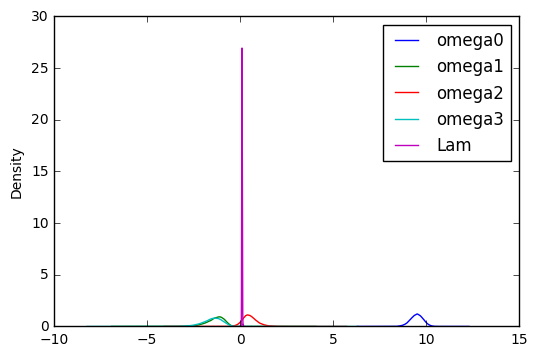

In [31]:
import pandas as pd
        
ellen.plot_density()


# Corner Plot

The corner plot graphically represent the distribution determined by the walkers. 


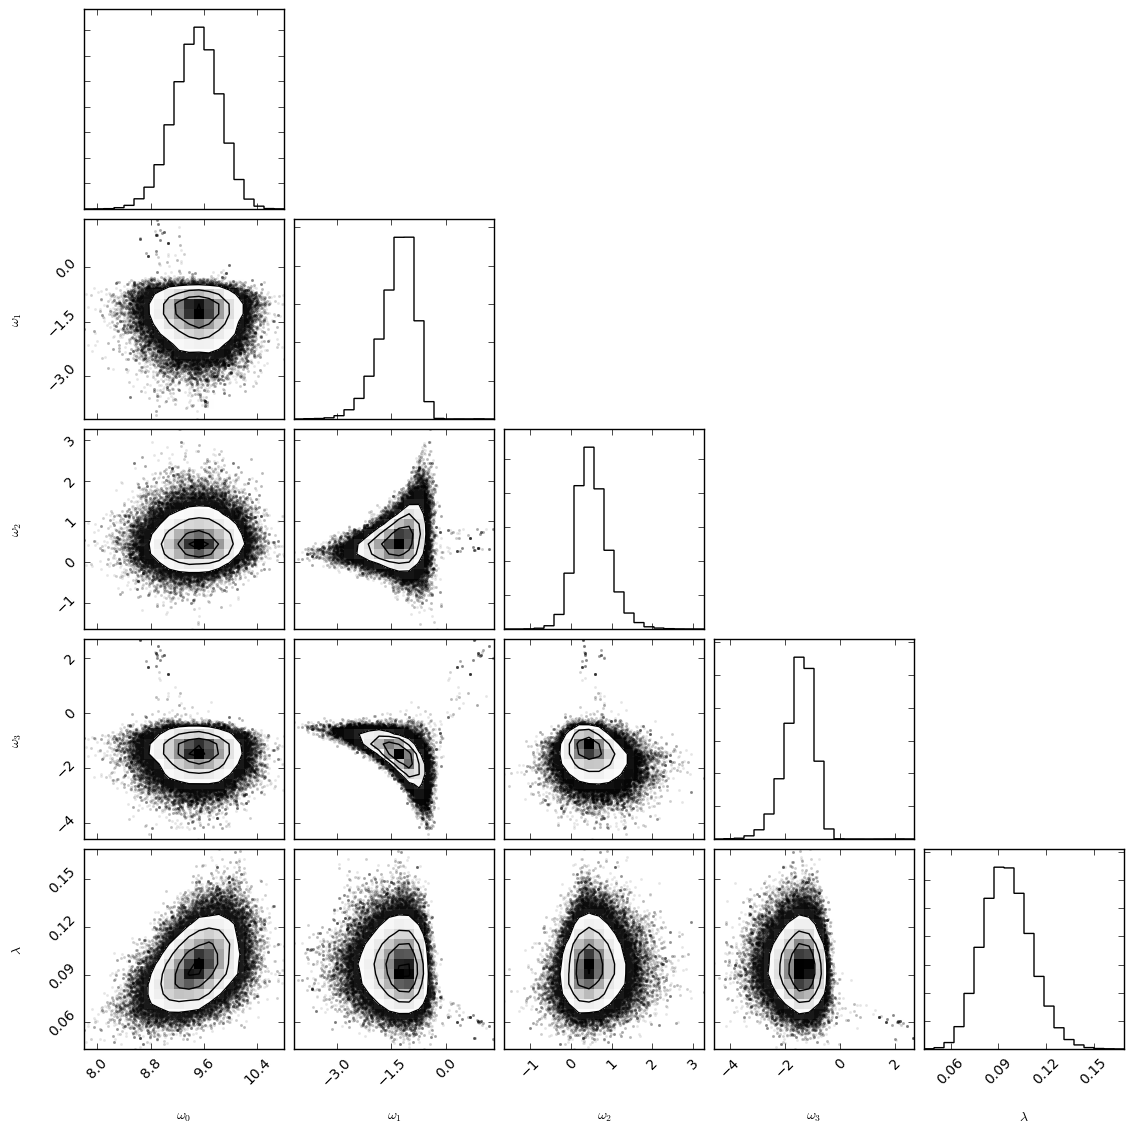

In [32]:
import corner

ellen.plot_corner()